In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import sys

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [10]:
#Read the dataset
data = pd.read_csv('Air pollution Dataset.csv')

In [11]:
print('dataframe shape:', data.shape)

dataframe shape: (43824, 13)


In [12]:
#shows first five rows of the DataFrame
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [13]:
#Removing null values

data.dropna(subset=['pm2.5'], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [14]:
data['datetime'] = data[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
data.sort_values('datetime', ascending=True, inplace=True)

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box plot of pm2.5')

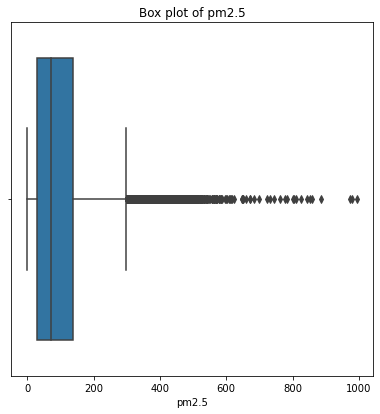

In [15]:
#box plot to visualize distribution of PM2.5
plt.figure(figsize=(6.5, 6.5))
g = sns.boxplot(data['pm2.5'])
g.set_title('Box plot of pm2.5')

Text(0.5, 1.0, 'PM2.5 Time series')

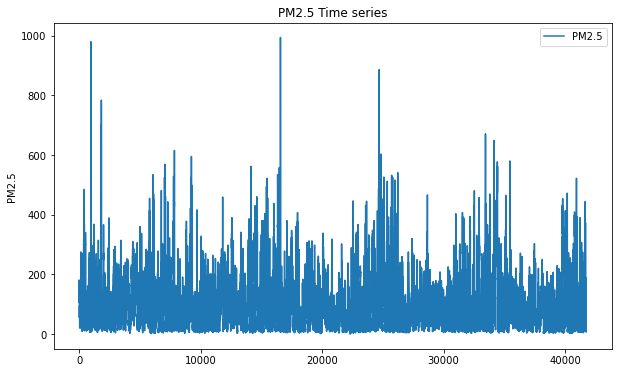

In [16]:
plt.figure(figsize=(10,6))
plt.plot(data['pm2.5'])
plt.legend(['PM2.5'] , loc='upper right')
plt.ylabel('PM2.5')
plt.title('PM2.5 Time series')

E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\Anaconda\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'pm2.5 readings')

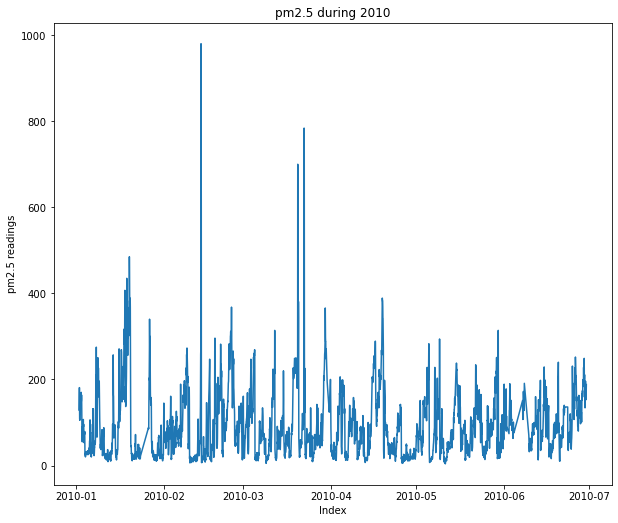

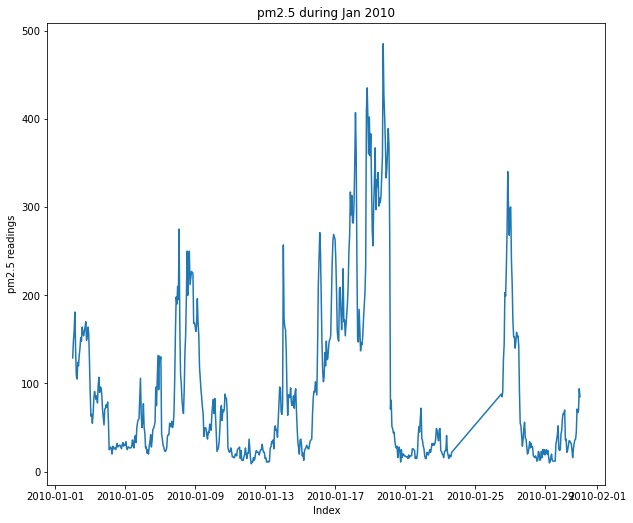

In [22]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=6,day=30)])
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(10, 8.5))
g = sns.lineplot(data['datetime'] , data['pm2.5'].loc[data['datetime']<=datetime.datetime(year=2010,month=1,day=31)],)
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_pm2.5'] = scaler.fit_transform(np.array(data['pm2.5']).reshape(-1, 1))

In [11]:
#splitting the dataset into train and test. 
#Dataset contains data from Jan 1st, 2010 to Dec 31st, 2014. 
#The first fours years - 2010 to 2013 is used as train and 2014 is kept for test.

split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
data_train = data.loc[data['datetime']<split_date]
data_test = data.loc[data['datetime']>=split_date]
print('Shape of train:', data_train.shape)
print('Shape of test:', data_test.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [12]:
#First five rows of train
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [13]:
#First five rows of validation
data_test.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [14]:
#Reset the indices of the validation set
data_test.reset_index(drop=True, inplace=True)

C:\Users\HP-PC\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\HP-PC\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Scaled pm2.5 readings')

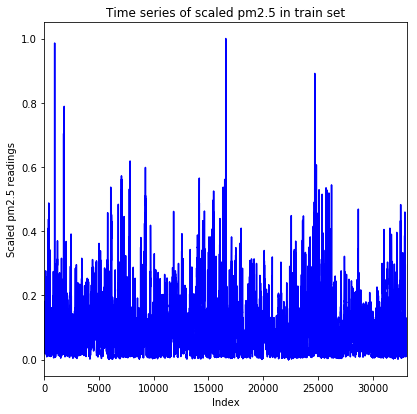

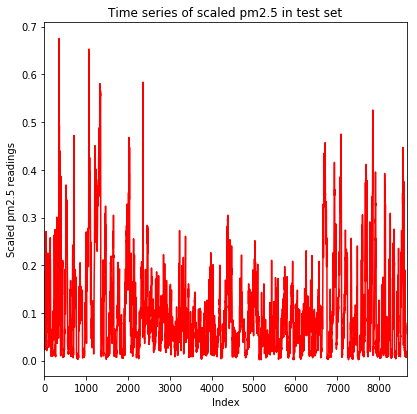

In [15]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(6.5, 6.5))
g = sns.tsplot(data_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(6.5, 6.5))
g = sns.tsplot(data_test['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in test set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

In [16]:
def makeXy(time_series, nb_timesteps):
    """
    Input: 
           time_series: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, time_series.shape[0]):
        X.append(list(time_series.loc[i-nb_timesteps:i-1]))
        y.append(time_series.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [17]:
data_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [18]:
X_train, y_train = makeXy(data_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [19]:
X_test, y_test = makeXy(data_test['scaled_pm2.5'], 7)
print('Shape of test arrays:', X_test.shape, y_test.shape)

Shape of test arrays: (8654, 7) (8654,)


In [20]:
#X_train and X_test are reshaped to 3D arrays
X_train, X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_test.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [21]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [22]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

In [23]:
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)

In [24]:
dropout_layer = Dropout(0.2)(gru_layer2)

In [25]:
output_layer = Dense(1, activation='linear')(dropout_layer)

In [26]:
time_series_model = Model(inputs=input_layer, outputs=output_layer)
time_series_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
time_series_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 64)             12672     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
time_series_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, validation_data=(X_test, y_test),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 19s 578us/step - loss: 0.0169 - val_loss: 0.0151
Epoch 2/20
33089/33089 [==============================] - 17s 503us/step - loss: 0.0152 - val_loss: 0.0118
Epoch 3/20
33089/33089 [==============================] - 17s 504us/step - loss: 0.0151 - val_loss: 0.0130
Epoch 4/20
33089/33089 [==============================] - 17s 520us/step - loss: 0.0151 - val_loss: 0.0120
Epoch 5/20
33089/33089 [==============================] - 17s 505us/step - loss: 0.0150 - val_loss: 0.0126
Epoch 6/20
33089/33089 [==============================] - 15s 463us/step - loss: 0.0149 - val_loss: 0.0125
Epoch 7/20
33089/33089 [==============================] - 17s 506us/step - loss: 0.0149 - val_loss: 0.0126
Epoch 8/20
33089/33089 [==============================] - 17s 517us/step - loss: 0.0149 - val_loss: 0.0122
Epoch 9/20
33089/33089 [==============================] - 17s 509us/step - loss: 0.0148 - val_l

In [37]:
predictions = time_series_model.predict(X_test)
predictions_pm25 = scaler.inverse_transform(predictions)
predictions_pm25 = np.squeeze(predictions_pm25)

In [38]:
from sklearn.metrics import mean_absolute_error

In [40]:
mae = mean_absolute_error(data_test['pm2.5'].loc[7:], predictions_pm25)
print('MAE for the test set:', round(mae, 4))

MAE for the test set: 11.777


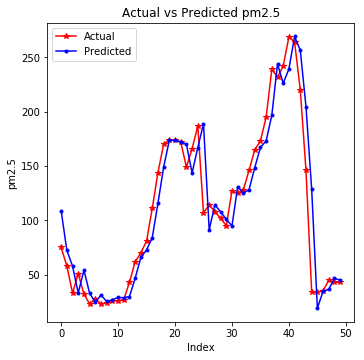

In [45]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), data_test['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), predictions_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('plot_GRU.jpeg', format='png', dpi=1000)